In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from lifelines import WeibullAFTFitter, LogLogisticAFTFitter, LogNormalAFTFitter
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('processed_data.csv')
df.head()

,Age,Weight (lbs),Gender,Ethnicity,Smoking status,%GG,Tumor Location (choice=RUL),Tumor Location (choice=RML),Tumor Location (choice=RLL),Tumor Location (choice=LUL),...,EGFR mutation status,KRAS mutation status,ALK translocation status,Adjuvant Treatment,Chemotherapy,Radiation,Recurrence,Days between CT and surgery,Time to Event,Event
0,79,146.0,0,2,1,0,0,1,1,1,...,1,1,1,0,0,0,0,42,3078,0
1,65,195.0,0,1,2,0,0,1,1,1,...,1,1,1,0,0,0,0,23,70,0
2,65,173.5,1,2,0,0,1,1,1,1,...,0,0,2,0,0,0,0,25,666,0
3,67,173.5,1,2,1,0,1,1,1,0,...,2,2,2,1,1,1,1,89,1172,0
4,84,145.0,1,4,1,0,1,0,1,1,...,2,1,2,0,0,0,1,92,1456,1


In [18]:
def f_get_Normalization(X: pd.DataFrame, norm_mode: str) -> pd.DataFrame:
    X_norm = X.copy()  # Tạo một bản sao để tránh thay đổi DataFrame gốc
    
    # Giả sử cột "Time to Event" và "Event" có tên cụ thể trong DataFrame
    cols_exclude = ["Time to Event", "Event"]
    
    # Xác định các cột feature cần chuẩn hóa
    feature_cols = [col for col in X.columns if col not in cols_exclude]

    if norm_mode == 'standard':  # Zero mean unit variance
        for col in feature_cols:
            std = X_norm[col].std()
            if std != 0:
                X_norm[col] = (X_norm[col] - X_norm[col].mean()) / std
            else:
                X_norm[col] = X_norm[col] - X_norm[col].mean()
    
    elif norm_mode == 'normal':  # Min-max normalization
        for col in feature_cols:
            min_val, max_val = X_norm[col].min(), X_norm[col].max()
            if max_val != min_val:
                X_norm[col] = (X_norm[col] - min_val) / (max_val - min_val)
            else:
                X_norm[col] = 0  # Hoặc giữ nguyên
    
    else:
        raise ValueError("INPUT MODE ERROR!")

    return X_norm

In [19]:
df = f_get_Normalization(df, 'standard')

df.head()

,Age,Weight (lbs),Gender,Ethnicity,Smoking status,%GG,Tumor Location (choice=RUL),Tumor Location (choice=RML),Tumor Location (choice=RLL),Tumor Location (choice=LUL),...,EGFR mutation status,KRAS mutation status,ALK translocation status,Adjuvant Treatment,Chemotherapy,Radiation,Recurrence,Days between CT and surgery,Time to Event,Event
0,1.110577,-0.649909,-1.726026,0.247976,0.092525,-0.722282,-1.325498,0.313923,0.41176,0.585997,...,-0.651141,-0.536477,-1.583368,-0.564687,-0.564687,-0.300463,-0.618017,-0.209956,3078,0
1,-0.478439,0.586273,-1.726026,-1.304569,1.757970,-0.722282,-1.325498,0.313923,0.41176,0.585997,...,-0.651141,-0.536477,-1.583368,-0.564687,-0.564687,-0.300463,-0.618017,-0.470472,70,0
2,-0.478439,0.043867,0.575342,0.247976,-1.572920,-0.722282,0.749194,0.313923,0.41176,0.585997,...,-1.971766,-1.802914,0.547520,-0.564687,-0.564687,-0.300463,-0.618017,-0.443049,666,0
3,-0.251437,0.043867,0.575342,0.247976,0.092525,-0.722282,0.749194,0.313923,0.41176,-1.694641,...,0.669483,0.729960,0.547520,1.758596,1.758596,3.305089,1.606843,0.434480,1172,0
4,1.678083,-0.675137,0.575342,3.353065,0.092525,-0.722282,0.749194,-3.163375,0.41176,0.585997,...,0.669483,-0.536477,0.547520,-0.564687,-0.564687,-0.300463,1.606843,0.475614,1456,1


In [3]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [4]:
aft = WeibullAFTFitter()
llf = LogLogisticAFTFitter()
lnf = LogNormalAFTFitter()

aft.fit(df_train, duration_col='Time to Event', event_col='Event')
llf.fit(df_train, duration_col='Time to Event', event_col='Event')
lnf.fit(df_train, duration_col='Time to Event', event_col='Event')


# aft.fit(df, duration_col='Time to Event', event_col='Event')
# llf.fit(df, duration_col='Time to Event', event_col='Event')
# lnf.fit(df, duration_col='Time to Event', event_col='Event')

c:\Users\ADMIN\anaconda3\envs\DATN\lib\site-packages\lifelines\fitters\__init__.py:2097: StatisticalWarning: The diagonal of the variance_matrix_ has negative values. This could be a problem with WeibullAFTFitter's fit to the data.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

  warnings.warn(warning_text, exceptions.StatisticalWarning)
c:\Users\ADMIN\anaconda3\envs\DATN\lib\site-packages\lifelines\fitters\__init__.py:2086: ApproximationWarning: The Hessian was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

Some ways to possible ways fix this:

0. Are there any lifelines warnings outputted during the `fit`?
1. Does a particularly large variable need to be centered to 0?
2. Inspect your DataFrame: does everything look as expected? Do you need to add/drop a constant (intercept) column?
3. Is there hig

<lifelines.LogNormalAFTFitter: fitted with 115 total observations, 73 right-censored observations>

In [5]:
aft.print_summary(3)  # access the results using aft.summary
with open("results_AFTWeibull.txt", "w") as f:
    f.write(aft.summary.to_string() + "\n")
    f.write(f"Concordance Index: {aft.concordance_index_}\n")
    f.write(f"Log-likelihood: {aft.log_likelihood_}\n")
    f.write(f"AIC: {aft.AIC_}\n")

<lifelines.WeibullAFTFitter: fitted with 115 total observations, 73 right-censored observations>
             duration col = 'Time to Event'
                event col = 'Event'
   number of observations = 115
number of events observed = 42
           log-likelihood = -364.015
         time fit was run = 2025-04-03 15:33:17 UTC

---
                                                            coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                                                           
lambda_ %GG                                                0.286     1.331     0.121           0.048           0.523               1.049               1.688
        ALK translocation status                           0.352     1.423     0.368          -0.369           1.074               0.692               2.926
        Adjuvant Treatment                                 0.269     1.309       NaN             NaN             NaN                 NaN                 NaN
        Age                                               -0.045     0.956     0.029          -0.103           0.013               0.903               1.013
        Chemotherapy                                       0.269     1.309       NaN             NaN             NaN                 NaN                 NaN
        Days between CT and surgery                        0.002     1.002     0.004          -0.005           0.010               0.995               1.010
        EGFR mutation status                              -0.242     0.785     0.317          -0.863           0.379               0.422               1.461
        Ethnicity                                          0.102     1.107     0.309          -0.503           0.706               0.605               2.027
        Gender                                            -0.638     0.528     0.537          -1.690           0.414               0.185               1.512
        Histology                                         -0.046     0.955     0.235          -0.507           0.415               0.603               1.515
        Histopathological Grade                            0.067     1.069     0.200          -0.325           0.459               0.722               1.582
        KRAS mutation status                               0.167     1.182     0.288          -0.398           0.733               0.672               2.081
        Lymphovascular invasion                           -0.108     0.897     0.311          -0.718           0.502               0.488               1.652
        Pathological M stage                              -0.959     0.383     0.518          -1.974           0.056               0.139               1.057
        Pathological N stage                              -0.910     0.402     0.269          -1.437          -0.383               0.238               0.682
        Pathological T stage                               0.051     1.053     0.139          -0.221           0.323               0.802               1.381
        Pleural invasion (elastic, visceral, or parietal) -0.632     0.531     0.492          -1.596           0.331               0.203               1.393
        Radiation                                         -0.034     0.967     0.795          -1.592           1.525               0.204               4.594
        Recurrence                                        -0.701     0.496     0.470          -1.623           0.221               0.197               1.247
        Smoking status                                    -0.298     0.742     0.360          -1.004           0.407               0.366               1.503
        Tumor Location (choice=LLL)                        0.405     1.499     0.813          -1.188           1.998               0.305               7.371
        Tumor Location (choice=LUL)                    

In [6]:
llf.print_summary(3)  # access the results using llf.summary
with open("results_AFTLlf.txt", "w") as f:
    f.write(llf.summary.to_string() + "\n")
    f.write(f"Concordance Index: {llf.concordance_index_}\n")
    f.write(f"Log-likelihood: {llf.log_likelihood_}\n")
    f.write(f"AIC: {llf.AIC_}\n")

<lifelines.LogLogisticAFTFitter: fitted with 115 total observations, 73 right-censored observations>
             duration col = 'Time to Event'
                event col = 'Event'
   number of observations = 115
number of events observed = 42
           log-likelihood = -366.451
         time fit was run = 2025-04-03 15:33:17 UTC

---
                                                           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                                                           
alpha_ %GG                                                0.349     1.418     0.129           0.096           0.603               1.100               1.828
       ALK translocation status                           0.356     1.428     0.505          -0.634           1.346               0.531               3.842
       Adjuvant Treatment                                 0.229     1.257     0.353          -0.462           0.920               0.630               2.509
       Age                                               -0.064     0.938     0.035          -0.132           0.004               0.876               1.004
       Chemotherapy                                       0.229     1.257     0.353          -0.462           0.920               0.630               2.509
       Days between CT and surgery                        0.002     1.002     0.004          -0.005           0.009               0.995               1.009
       EGFR mutation status                              -0.143     0.867     0.335          -0.799           0.514               0.450               1.671
       Ethnicity                                          0.262     1.299     0.347          -0.418           0.941               0.658               2.563
       Gender                                            -0.733     0.481     0.639          -1.986           0.520               0.137               1.683
       Histology                                          0.087     1.091     0.282          -0.466           0.640               0.628               1.896
       Histopathological Grade                            0.121     1.128     0.230          -0.331           0.572               0.718               1.772
       KRAS mutation status                               0.082     1.086     0.319          -0.544           0.708               0.580               2.030
       Lymphovascular invasion                           -0.074     0.928     0.343          -0.747           0.598               0.474               1.819
       Pathological M stage                              -0.658     0.518     0.601          -1.836           0.519               0.159               1.680
       Pathological N stage                              -0.882     0.414     0.419          -1.704          -0.061               0.182               0.941
       Pathological T stage                               0.005     1.005     0.155          -0.299           0.310               0.741               1.363
       Pleural invasion (elastic, visceral, or parietal) -0.651     0.522     0.531          -1.692           0.390               0.184               1.478
       Radiation                                         -0.061     0.941     0.881          -1.789           1.666               0.167               5.293
       Recurrence                                        -0.653     0.521     0.465          -1.564           0.258               0.209               1.295
       Smoking status                                    -0.085     0.919     0.369          -0.808           0.638               0.446               1.893
       Tumor Location (choice=LLL)                        0.719     2.051     1.920          -3.044           4.481               0.048              88.337
       Tumor Location (choice=LUL)                        0.649     1.913 

In [7]:
lnf.print_summary(3)  # access the results using lnf.summary
with open("results_AFTLnf.txt", "w") as f:
    f.write(lnf.summary.to_string() + "\n")
    f.write(f"Concordance Index: {lnf.concordance_index_}\n")
    f.write(f"Log-likelihood: {lnf.log_likelihood_}\n")
    f.write(f"AIC: {lnf.AIC_}\n")

<lifelines.LogNormalAFTFitter: fitted with 115 total observations, 73 right-censored observations>
             duration col = 'Time to Event'
                event col = 'Event'
   number of observations = 115
number of events observed = 42
           log-likelihood = -368.591
         time fit was run = 2025-04-03 15:33:17 UTC

---
                                                           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                                                           
mu_    %GG                                                0.451     1.570     0.142           0.173           0.728               1.189               2.072
       ALK translocation status                           0.489     1.631     0.597          -0.681           1.660               0.506               5.258
       Adjuvant Treatment                                 0.138     1.148       NaN             NaN             NaN                 NaN                 NaN
       Age                                               -0.080     0.923     0.039          -0.156          -0.004               0.856               0.996
       Chemotherapy                                       0.138     1.148       NaN             NaN             NaN                 NaN                 NaN
       Days between CT and surgery                        0.003     1.003     0.004          -0.005           0.010               0.995               1.010
       EGFR mutation status                              -0.160     0.852     0.382          -0.909           0.590               0.403               1.803
       Ethnicity                                          0.368     1.446     0.387          -0.390           1.127               0.677               3.085
       Gender                                            -0.896     0.408     0.739          -2.344           0.553               0.096               1.738
       Histology                                          0.187     1.206     0.310          -0.421           0.796               0.656               2.216
       Histopathological Grade                            0.147     1.158     0.260          -0.363           0.656               0.696               1.928
       KRAS mutation status                               0.166     1.181     0.353          -0.526           0.859               0.591               2.361
       Lymphovascular invasion                            0.037     1.038     0.403          -0.752           0.827               0.471               2.286
       Pathological M stage                              -0.582     0.559     0.788          -2.125           0.962               0.119               2.618
       Pathological N stage                              -0.919     0.399     0.497          -1.893           0.054               0.151               1.056
       Pathological T stage                              -0.030     0.970     0.180          -0.382           0.322               0.682               1.379
       Pleural invasion (elastic, visceral, or parietal) -0.702     0.495     0.583          -1.844           0.440               0.158               1.552
       Radiation                                          0.092     1.096     1.014          -1.895           2.079               0.150               7.996
       Recurrence                                        -0.509     0.601     0.550          -1.586           0.568               0.205               1.765
       Smoking status                                    -0.023     0.978     0.419          -0.844           0.799               0.430               2.223
       Tumor Location (choice=LLL)                        0.876     2.402     2.421          -3.869           5.621               0.021             276.292
       Tumor Location (choice=LUL)                        0.892     2.441   

In [16]:
cumulative_hazard = aft.predict_cumulative_hazard(df_test)
survival_function = aft.predict_survival_function(df_test)
median_prediction = aft.predict_median(df_test)
percentile_prediction = aft.predict_percentile(df_test, p=0.9)
expectation_prediction = aft.predict_expectation(df_test)

In [8]:
aft_test_ci = aft.score(df_test, scoring_method="concordance_index")
print(aft_test_ci)
with open("results_AFTWeibull.txt", "a") as f:
    f.write(f"Concordance Index on Test: {aft_test_ci}\n")
    
llf_test_ci = llf.score(df_test, scoring_method="concordance_index")
print(llf_test_ci)
with open("results_AFTLlf.txt", "a") as f:
    f.write(f"Concordance Index on Test: {llf_test_ci}\n")
    
lnf_test_ci = lnf.score(df_test, scoring_method="concordance_index")
print(lnf_test_ci)
with open("results_AFTLnf.txt", "a") as f:
    f.write(f"Concordance Index on Test: {lnf_test_ci}\n")

0.7135135135135136
0.7621621621621621
0.7513513513513513


In [17]:
with open("results_AFTWeibull.txt", "a") as f:
    f.write("\n===== Predictions from AFT Model =====\n")
    
    f.write("Cumulative Hazard:\n")
    f.write(cumulative_hazard.to_string() + "\n\n")
    
    f.write("Survival Function:\n")
    f.write(survival_function.to_string() + "\n\n")
    
    f.write("Median Prediction:\n")
    f.write(median_prediction.to_string() + "\n\n")
    
    f.write("90th Percentile Prediction:\n")
    f.write(percentile_prediction.to_string() + "\n\n")
    
    f.write("Expectation Prediction:\n")
    f.write(expectation_prediction.to_string() + "\n\n")

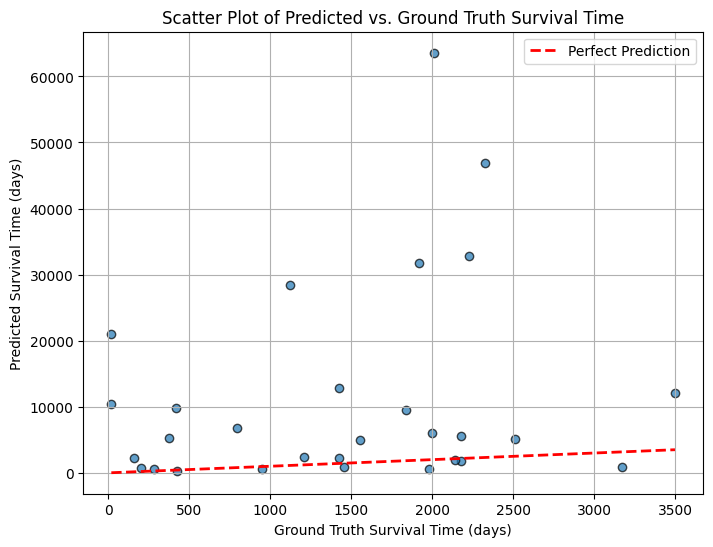

In [21]:
# Giả sử bạn có dữ liệu ground truth và predicted survival time
# Thay thế bằng dữ liệu thực tế của bạn
ground_truth = np.array(df_test['Time to Event'])
predicted = np.array(expectation_prediction)

plt.figure(figsize=(8, 6))
plt.scatter(ground_truth, predicted, alpha=0.7, edgecolors='k')
plt.plot([ground_truth.min(), ground_truth.max()], [ground_truth.min(), ground_truth.max()], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel("Ground Truth Survival Time (days)")
plt.ylabel("Predicted Survival Time (days)")
plt.title("Scatter Plot of Predicted vs. Ground Truth Survival Time")
plt.legend()
plt.grid(True)
plt.show()